In [64]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Imports: pip install -r requirements.txt
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
import numpy as np

In [65]:
# Get the values & pieces from the TetraVex game
# Values are for visualization
# Pieces are for the algorithm
def getValuesAndPieces(file):
    north = []
    east = []
    south = []
    west = []
    pieces = {}
    i = 0
    for line in file:
        sides = line.split(" ")
        pieces[i] = [int(sides[0]), int(sides[1]), int(sides[2]), int(sides[3])]
        i += 1
        north.append([int(sides[0])])
        east.append([int(sides[1])])
        south.append([int(sides[2])])
        west.append([int(sides[3])])

    values = [north, east, south, west]
    print("values: " + str(values))
    print("pieces: " + str(pieces))
    return values, pieces

In [66]:
def visualizeBoard(values, sizeBoard):
    xv, yv = np.meshgrid(np.arange(-0.5, sizeBoard), np.arange(-0.5, sizeBoard))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, sizeBoard), np.arange(0, sizeBoard))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (sizeBoard + 1) * (sizeBoard + 1)  # indices of the centers

    trianglesN = [(i + j * (sizeBoard + 1), i + 1 + j * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesE = [(i + 1 + j * (sizeBoard + 1), i + 1 + (j + 1) * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesS = [(i + 1 + (j + 1) * (sizeBoard + 1), i + (j + 1) * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesW = [(i + (j + 1) * (sizeBoard + 1), i + j * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    triangul = [Triangulation(x, y, triangles) for triangles in [trianglesN, trianglesE, trianglesS, trianglesW]]

    cmaps = 'tab10' # Color map based out of 10 colors
    fig, ax = plt.subplots()
    imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmaps, vmin=0, vmax=9, ec='white')
                for t, val in zip(triangul, values)]

    # TODO Add text (nog te fixen)
    # for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    #     for i in range(M):
    #         for j in range(N):
    #             v = val[j, i]
    #             ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.2f}', color='k' if 0.2 < v < 0.8 else 'w', ha='center', va='center')
    # cbar = fig.colorbar(imgs[0], ax=ax)

    ax.set_xticks(range(sizeBoard))
    ax.set_yticks(range(sizeBoard))
    ax.invert_yaxis()
    ax.margins(x=0, y=0)
    ax.set_aspect('equal', 'box')  # square cells
    plt.tight_layout()
    plt.show()

values: [[[6], [7], [5], [7], [3], [8], [8], [4], [5]], [[8], [1], [1], [5], [6], [9], [3], [3], [9]], [[7], [3], [8], [8], [4], [5], [7], [5], [2]], [[2], [8], [1], [7], [5], [6], [4], [3], [3]]]
pieces: {0: [6, 8, 7, 2], 1: [7, 1, 3, 8], 2: [5, 1, 8, 1], 3: [7, 5, 8, 7], 4: [3, 6, 4, 5], 5: [8, 9, 5, 6], 6: [8, 3, 7, 4], 7: [4, 3, 5, 3], 8: [5, 9, 2, 3]}


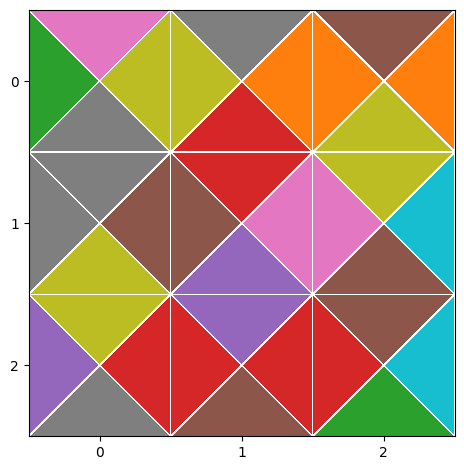

In [67]:
# Solution
sizeBoard = 3
file = open("./dataFiles/TetraVex_3x3_Solution.txt", "r")
values, pieces = getValuesAndPieces(file)
visualizeBoard(values, sizeBoard)

values: [[[7], [5], [3], [5], [6], [8], [8], [4], [7]], [[1], [9], [6], [1], [8], [9], [3], [3], [5]], [[3], [2], [4], [8], [7], [5], [7], [5], [8]], [[8], [3], [5], [1], [2], [6], [4], [3], [7]]]
pieces: {0: [7, 1, 3, 8], 1: [5, 9, 2, 3], 2: [3, 6, 4, 5], 3: [5, 1, 8, 1], 4: [6, 8, 7, 2], 5: [8, 9, 5, 6], 6: [8, 3, 7, 4], 7: [4, 3, 5, 3], 8: [7, 5, 8, 7]}


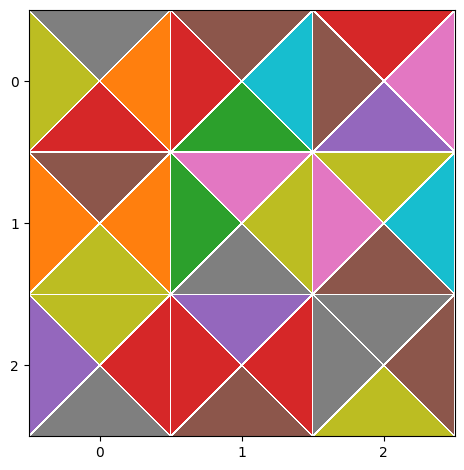

In [68]:
# Start board
sizeBoard = 3
file = open("./dataFiles/TetraVex_3x3.txt", "r")
values, pieces = getValuesAndPieces(file)
visualizeBoard(values, sizeBoard)

{0: [2, 3], 2: [5, 7], 3: [5, 6], 4: [0, 8], 5: [1, 3], 6: [0, 1, 7, 8], 7: [1, 3], 8: [2, 5, 6]}


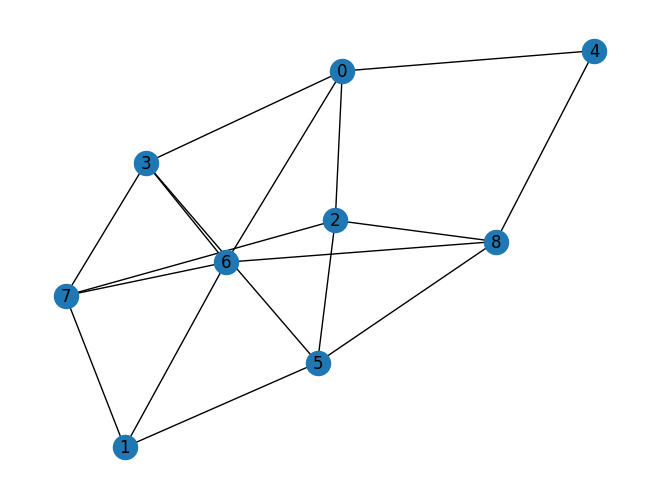

In [74]:
# Build Graph
size = len(pieces)
graph = {}
for key1, value1 in pieces.items():
    for key2, value2 in pieces.items():
        if key1 == key2:
            continue
        if value1[1] == value2[3] or value1[2] == value2[0]:         
            graph.setdefault(key1, []).append(key2)
            # print(str(key1) + " " + str(key2) + " " + str(value1[1]) + " " + str(value2[3]))
            # print(str(key1) + " " + str(key2) + " " + str(value1[2]) + " " + str(value2[0]))
print(graph)
G = nx.Graph()
G.add_nodes_from(pieces.keys())
for node, edges in graph.items():
    for edge in edges:
        G.add_edge(node, edge)
nx.draw(G, with_labels = True)
plt.show()

In [70]:
def is_safe(v, pos, path, graph):
    for i in range(pos):
        if graph[path[i]][v] == 1:
            return False
    return True

In [72]:
def max_clique_util(path, pos, max_size, size):
    if pos == size * size:
            return pos

        max_size = max(max_size, pos)

        for v in range(pos, size * size):
            if is_safe(v, pos, path):
                path[pos] = v
                max_size = max(max_size, max_clique_util(path, pos + 1, max_size))
                path[pos] = -1

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [ ]:
def solve(puzzle):
    size = len(puzzle)
    path = [-1] * (size * size)
    max_clique_size = max_clique_util(path, 0, 0)
    return max_clique_size